In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the path to your CSV file
csv_file_path = '/content/drive/MyDrive/Thesis/Dataset/1700_sentences.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to inspect its structure
print(df.head())

# Display the column names
print("Columns in the dataset:", df.columns.tolist())


                                            Sentence
0  Currently, Air Marshal is overseeing Operation...
1  On May 01, 2002, Air Chief Marshal was involve...
2  Currently, Assistant Warrant Officer is overse...
3  Currently, Flight Lieutenant is overseeing Ope...
4  On August 16, 2005, Rear Admiral was involved ...
Columns in the dataset: ['Sentence']


In [ ]:
df.columns

Index(['Sentence'], dtype='object')

In [2]:
import json

# Define the path to your JSON file
json_file_path = '/content/drive/MyDrive/Final_Thesis/dataset/annotations.json'

import json

# Load the JSON file
with open(json_file_path, 'r') as file:
    annotated_data = json.load(file)

# Check the type of the annotated data
print("Type of annotated data:", type(annotated_data))

# If it's a dictionary, print its keys
if isinstance(annotated_data, dict):
    print("Keys in the annotated data:", annotated_data.keys())

# If it's a list, print the first few elements
elif isinstance(annotated_data, list):
    print("First few elements in the annotated data:", annotated_data[:3])



Type of annotated data: <class 'dict'>
Keys in the annotated data: dict_keys(['classes', 'annotations'])


In [3]:
# Extracting annotations
annotations = annotated_data['annotations']


In [4]:
import nltk

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**Start from this step NLTK process**

In [5]:
import json

json_file_path = '/content/drive/MyDrive/Final_Thesis/dataset/annotations.json'

with open(json_file_path, 'r') as file:
    annotated_data = json.load(file)

annotations = annotated_data['annotations']


In [6]:
import nltk
from nltk.tokenize import word_tokenize

# Make sure you have the necessary NLTK packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenization and POS tagging
def tokenize_and_tag(sentence):
    tokens = word_tokenize(sentence)
    return nltk.pos_tag(tokens)

# Extract features for each token
def extract_features(sentence):
    return [{'word': word, 'pos': pos} for word, pos in sentence]

# Align labels with tokens
def align_labels_with_tokens(tokens, entities, text):
    labels = ['O'] * len(tokens)  # Default label for tokens outside any entity
    for start, end, entity_type in entities:
        # Adjust start and end indices for token alignment
        for i, (word, _) in enumerate(tokens):
            if start <= text.find(word) < end:
                labels[i] = entity_type
    return labels


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
# Print the first annotation to inspect its structure
print(annotations[0])


['on july 06 2001 in sahiwal subedar major led operation swift retort employing hatf ballistic missile\r', {'entities': [[3, 15, 'DATE'], [19, 26, 'LOCATION'], [27, 40, 'RANK'], [45, 67, 'OPERATION'], [83, 100, 'WEAPON']]}]


In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK packages are available
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenization and POS tagging
def tokenize_and_tag(sentence):
    tokens = word_tokenize(sentence)
    return nltk.pos_tag(tokens)

# Extract features for each token
def extract_features(sentence):
    return [{'word': word, 'pos': pos} for word, pos in sentence]

# Align labels with tokens
def align_labels_with_tokens(tokens, entities):
    labels = ['O'] * len(tokens)  # Default label for tokens outside any entity
    for start, end, entity_type in entities:
        for i, (word, _) in enumerate(tokens):
            if start <= sentence.find(word) < end:
                if sentence.find(word) == start:
                    labels[i] = 'B-' + entity_type  # Beginning of the entity
                else:
                    labels[i] = 'I-' + entity_type  # Inside the entity
    return labels


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
processed_data = []

for item in annotations:
    sentence, annotation = item
    entities = annotation['entities']

    # Tokenize and tag the sentence
    tokenized_sentence = tokenize_and_tag(sentence)

    # Extract features
    features = extract_features(tokenized_sentence)

    # Align labels with tokens
    labels = align_labels_with_tokens(tokenized_sentence, entities)

    processed_data.append((features, labels))


In [10]:
X = [entry[0] for entry in processed_data]  # Features
y = [entry[1] for entry in processed_data]  # Labels


In [11]:
from sklearn.feature_extraction import DictVectorizer

# Initialize the DictVectorizer
vec = DictVectorizer()

# Flatten the list of features and transform into vectors
X_flattened = [feature for sentence in X for feature in sentence]
X_vectorized = vec.fit_transform(X_flattened)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Flatten the list of labels
y_flattened = [label for sentence in y for label in sentence]

# Encode labels into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_flattened)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the predictions
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

      B-DATE       1.00      0.99      0.99       207
  B-LOCATION       1.00      0.99      0.99       336
 B-OPERATION       1.00      0.99      1.00       263
      B-RANK       0.82      0.86      0.84       228
    B-WEAPON       0.95      0.98      0.96       241
      I-DATE       0.80      0.99      0.88       427
  I-LOCATION       0.99      0.96      0.98       209
 I-OPERATION       0.92      0.85      0.88       416
      I-RANK       0.82      0.51      0.63       215
    I-WEAPON       0.95      0.91      0.93       252
           O       0.95      0.95      0.95      2669

    accuracy                           0.93      5463
   macro avg       0.93      0.91      0.91      5463
weighted avg       0.93      0.93      0.93      5463



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [17]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       207
           1       1.00      0.99      0.99       336
           2       1.00      0.99      1.00       263
           3       0.82      0.86      0.84       228
           4       0.95      0.98      0.96       241
           5       0.80      0.99      0.88       427
           6       0.98      0.96      0.97       209
           7       0.92      0.85      0.88       416
           8       0.82      0.51      0.63       215
           9       0.95      0.91      0.93       252
          10       0.95      0.95      0.95      2669

    accuracy                           0.93      5463
   macro avg       0.93      0.91      0.91      5463
weighted avg       0.93      0.93      0.93      5463



In [18]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


In [19]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       207
           1       1.00      0.99      0.99       336
           2       1.00      0.99      1.00       263
           3       0.82      0.86      0.84       228
           4       0.95      0.96      0.96       241
           5       0.79      0.99      0.88       427
           6       1.00      0.96      0.98       209
           7       0.92      0.84      0.87       416
           8       0.82      0.51      0.63       215
           9       0.96      0.89      0.92       252
          10       0.94      0.95      0.95      2669

    accuracy                           0.93      5463
   macro avg       0.93      0.90      0.91      5463
weighted avg       0.93      0.93      0.93      5463



In [20]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)


In [21]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       207
           1       1.00      0.98      0.99       336
           2       1.00      0.99      1.00       263
           3       0.82      0.86      0.84       228
           4       0.95      0.95      0.95       241
           5       0.79      0.99      0.88       427
           6       1.00      0.96      0.98       209
           7       0.91      0.83      0.87       416
           8       0.81      0.48      0.61       215
           9       0.97      0.88      0.92       252
          10       0.94      0.95      0.95      2669

    accuracy                           0.93      5463
   macro avg       0.93      0.89      0.90      5463
weighted avg       0.93      0.93      0.92      5463



In [22]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)


In [23]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       207
           1       1.00      0.96      0.98       336
           2       1.00      0.99      1.00       263
           3       0.73      0.92      0.81       228
           4       0.69      0.97      0.81       241
           5       0.78      1.00      0.88       427
           6       1.00      0.96      0.98       209
           7       0.99      0.76      0.86       416
           8       0.92      0.32      0.48       215
           9       0.99      0.83      0.90       252
          10       0.94      0.93      0.93      2669

    accuracy                           0.90      5463
   macro avg       0.89      0.87      0.86      5463
weighted avg       0.91      0.90      0.90      5463



In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)


In [25]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       207
           1       1.00      0.94      0.97       336
           2       1.00      0.99      1.00       263
           3       0.84      0.83      0.84       228
           4       0.95      0.95      0.95       241
           5       0.79      1.00      0.88       427
           6       0.98      0.99      0.98       209
           7       0.92      0.81      0.86       416
           8       0.80      0.54      0.64       215
           9       0.98      0.85      0.91       252
          10       0.93      0.95      0.94      2669

    accuracy                           0.92      5463
   macro avg       0.93      0.89      0.91      5463
weighted avg       0.92      0.92      0.92      5463



In [26]:
from sklearn.metrics import classification_report

# Example for Random Forest
rf_report = classification_report(y_test, rf_predictions, output_dict=True)

# Repeat for other models
svm_report = classification_report(y_test, svm_predictions, output_dict=True)
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
nb_report = classification_report(y_test, nb_predictions, output_dict=True)
gb_report = classification_report(y_test, gb_predictions, output_dict=True)


In [27]:
import pandas as pd

# Create a DataFrame from the reports
report_df = pd.DataFrame({
    'Random Forest': rf_report['weighted avg'],
    'SVM': svm_report['weighted avg'],
    'Logistic Regression': logreg_report['weighted avg'],
    'Naive Bayes': nb_report['weighted avg'],
    'Gradient Boosting': gb_report['weighted avg']
})

# Transpose the DataFrame for better readability
report_df = report_df.T

# Reset index to have model names as a column
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the DataFrame
print(report_df)


                 Model  precision    recall  f1-score  support
0        Random Forest   0.933238  0.932089  0.930234   5463.0
1                  SVM   0.930004  0.928611  0.926718   5463.0
2  Logistic Regression   0.926756  0.925499  0.923255   5463.0
3          Naive Bayes   0.913440  0.901153  0.897281   5463.0
4    Gradient Boosting   0.924725  0.923119  0.921356   5463.0


In [28]:
report_df


,Model,precision,recall,f1-score,support
0,Random Forest,0.933238,0.932089,0.930234,5463.0
1,SVM,0.930004,0.928611,0.926718,5463.0
2,Logistic Regression,0.926756,0.925499,0.923255,5463.0
3,Naive Bayes,0.913440,0.901153,0.897281,5463.0
4,Gradient Boosting,0.924725,0.923119,0.921356,5463.0


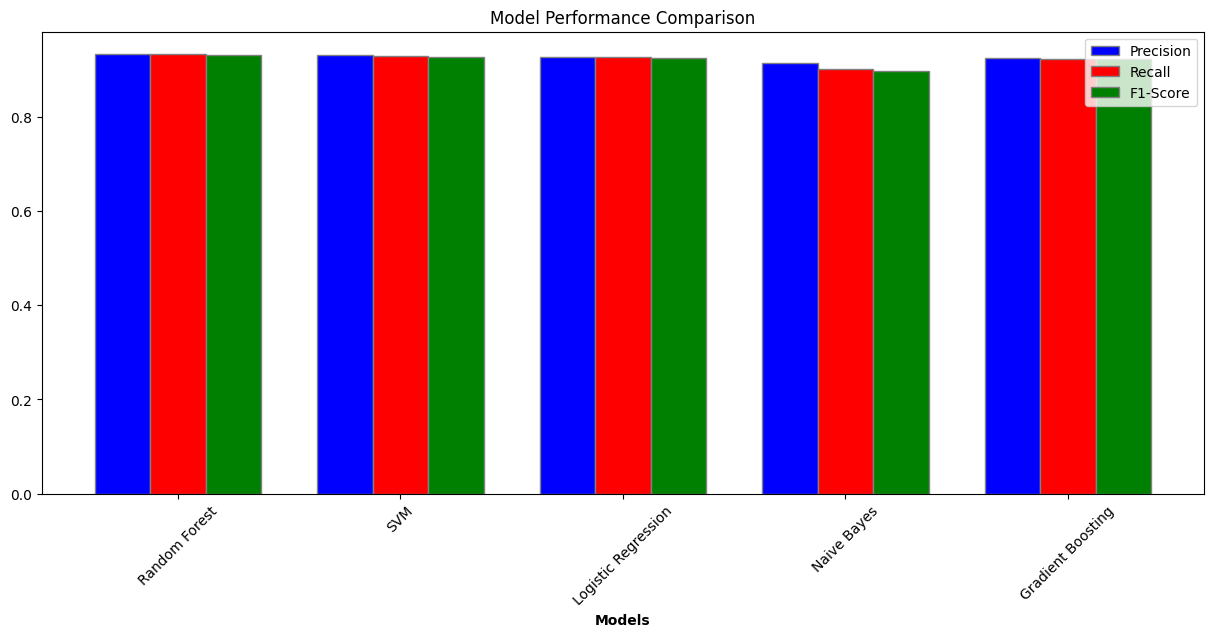

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Set the positions and width for the bars
barWidth = 0.25
r1 = np.arange(len(report_df))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create bars for each metric
plt.bar(r1, report_df['precision'], color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, report_df['recall'], color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, report_df['f1-score'], color='g', width=barWidth, edgecolor='grey', label='F1-Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(report_df))], report_df['Model'], rotation=45)
plt.title('Model Performance Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()


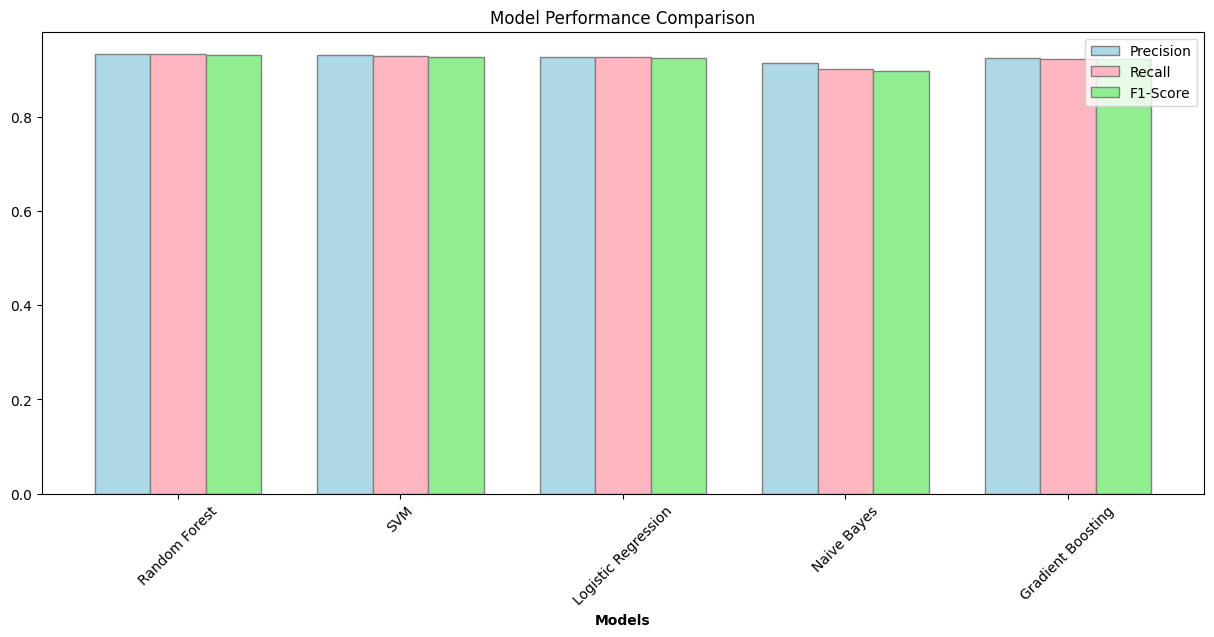

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Set the positions and width for the bars
barWidth = 0.25
r1 = np.arange(len(report_df))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create bars for each metric with lighter colors
plt.bar(r1, report_df['precision'], color='#add8e6', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, report_df['recall'], color='#ffb6c1', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, report_df['f1-score'], color='#90ee90', width=barWidth, edgecolor='grey', label='F1-Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(report_df))], report_df['Model'], rotation=45)
plt.title('Model Performance Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()


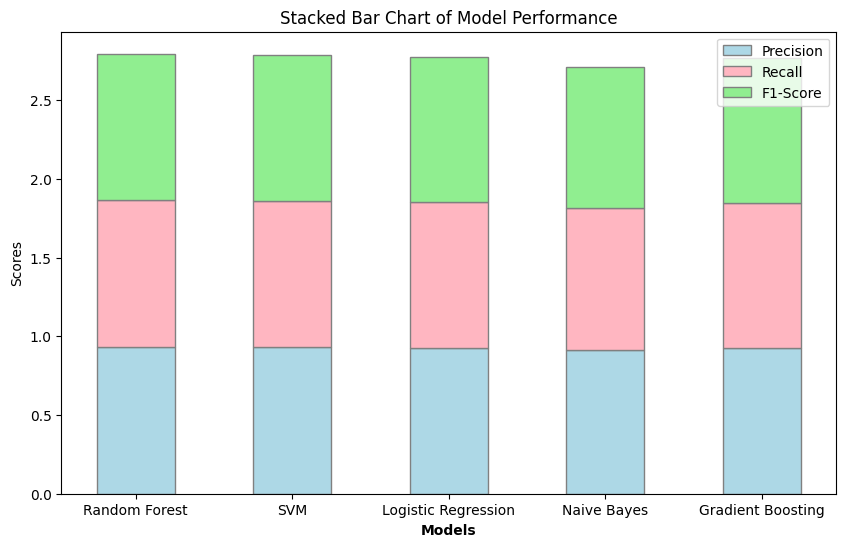

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define the bar width
barWidth = 0.5

# Set the position of bars on the X-axis
r = np.arange(len(report_df))

# Make the plot
plt.bar(r, report_df['precision'], color='#add8e6', edgecolor='grey', width=barWidth, label='Precision')
plt.bar(r, report_df['recall'], bottom=report_df['precision'], color='#ffb6c1', edgecolor='grey', width=barWidth, label='Recall')
plt.bar(r, report_df['f1-score'], bottom=[i+j for i,j in zip(report_df['precision'], report_df['recall'])], color='#90ee90', edgecolor='grey', width=barWidth, label='F1-Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r for r in range(len(report_df))], report_df['Model'])
plt.ylabel('Scores')
plt.title('Stacked Bar Chart of Model Performance')

# Create legend & Show graphic
plt.legend()
plt.show()


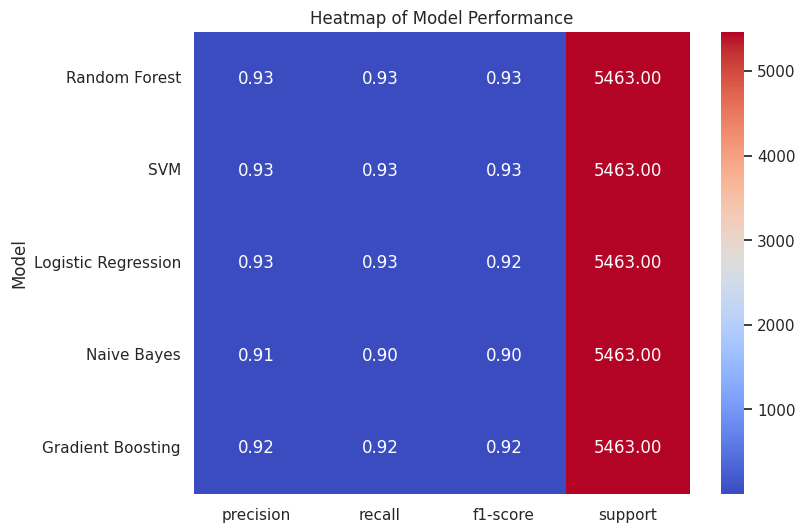

In [32]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Prepare data for heatmap
heatmap_data = report_df.set_index('Model')

# Draw a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Model Performance')
plt.show()


In [48]:
def preprocess_new_text(new_text):
    # Tokenize and POS tag the new text
    tokenized_text = nltk.pos_tag(word_tokenize(new_text))
    # Extract features for each token
    features = extract_features(tokenized_text)
    return features

# Example new text
new_text = "Lieutenant reported a missile in Red River on 2023-11-02."
processed_new_text = preprocess_new_text(new_text)


In [49]:
# Transform the new text features
X_new = vec.transform(processed_new_text)


In [50]:
# Predict labels for the new text
predicted_labels = rf_model.predict(X_new)

# If necessary, transform numeric labels back to original string labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Combine tokens with predicted labels
predicted_entities = list(zip(word_tokenize(new_text), predicted_labels))
print(predicted_entities)


[('Lieutenant', 'B-RANK'), ('reported', 'O'), ('a', 'I-OPERATION'), ('missile', 'B-WEAPON'), ('in', 'O'), ('Red', 'B-LOCATION'), ('River', 'I-LOCATION'), ('on', 'O'), ('2023-11-02', 'B-DATE'), ('.', 'O')]


In [51]:
from IPython.core.display import display, HTML

# Create an HTML string to display the text with colored labels
html = '<div style="font-family: Arial; font-size: 16px; line-height: 1.5;">'

# Define a color scheme for your labels
label_colors = {
    'B-RANK': '#ffadad',
    'B-WEAPON': '#bdb2ff',
    'B-OPERATION': '#9bf6ff',
    'B-LOCATION': '#fdffb6',
    'B-DATE': '#ffd6a5',
    'O': 'black'  # default color for 'other' labels
}

for token, label in predicted_entities:
    # Get color for the label, default to black if label not in dictionary
    color = label_colors.get(label, 'black')
    # Wrap token in span with style
    html += f'<span style="background-color: {color}; padding: 2px 4px; border-radius: 4px; margin-right: 4px;">{token}</span>'

# Close the HTML string
html += '</div>'

# Display the HTML
display(HTML(html))


In [52]:
from IPython.core.display import display, HTML

# Create an HTML string to display the text with colored labels
html = '<div style="font-family: Arial; font-size: 16px; line-height: 1.5;">'

# Define a color scheme for your labels
label_colors = {
    'B-RANK': '#ffadad',   # Example: light red
    'B-WEAPON': '#bdb2ff',  # Example: light purple
    'B-OPERATION': '#9bf6ff',  # Example: light blue
    'B-LOCATION': '#fdffb6',  # Example: light yellow
    'B-DATE': '#ffd6a5',  # Example: light orange
    'O': '#b0f2b4'  # Example: light green for 'other' labels
}

for token, label in predicted_entities:
    # Get color for the label, default to light green if label not in dictionary
    color = label_colors.get(label, '#b0f2b4')
    # Wrap token in span with style, and append the label type
    html += f'<span style="background-color: {color}; padding: 2px 4px; border-radius: 4px; margin-right: 4px;">{token} ({label})</span>'

# Close the HTML string
html += '</div>'

# Display the HTML
display(HTML(html))
